<a href="https://colab.research.google.com/github/FaisalNihal/Customer-Segmentation-for-an-E-Commerce-Platform-Using-K-Means-Clustering/blob/main/E_Commerce_Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary Libraries**


In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn

# **Mount with Google Drive**

In [415]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Gather The Datasets**

In [416]:
Dt_Cust= pd.read_csv('/content/drive/My Drive/large_ecommerce_dim_customers.csv')
Dt_Fact= pd.read_csv('/content/drive/My Drive/large_ecommerce_fact_table.csv')


Dt_Fact.head(5)
Dt_Fact.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    5200 non-null   int64  
 1   CustomerID       5200 non-null   int64  
 2   TransactionDate  5200 non-null   object 
 3   ProductID        5200 non-null   int64  
 4   Quantity         5200 non-null   int64  
 5   UnitPrice        5200 non-null   object 
 6   TotalAmount      5200 non-null   object 
 7   Rating           4379 non-null   float64
 8   PaymentMethod    4125 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 365.8+ KB


**Create copy of the datasets**


In [478]:
CUSTOMER=Dt_Cust.copy()
Fact_=Dt_Fact.copy()
Fact_.head(5)

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalAmount,Rating,PaymentMethod
0,1,1276,2023-01-10 00:00:00,200,3,310.11,<function <lambda> at 0x7ebdb933e050>,4.0,12345
1,2,1471,2023-08-21 00:00:00,204,4,558.96,<function <lambda> at 0x7ebdb933e050>,4.0,PayPal
2,3,1376,2023-07-14 00:00:00,262,7,70.08,<function <lambda> at 0x7ebdb933e050>,1.0,Credit Card
3,4,1377,2023-01-12 00:00:00,298,6,131.71,<function <lambda> at 0x7ebdb933e050>,2.0,PayPal
4,5,1388,2023-06-26 00:00:00,235,11,Unknown,<function <lambda> at 0x7ebdb933e050>,NaN,12345


In [479]:
CUSTOMER.head(5)

,CustomerID,CustomerName,JoinDate,Country,Age
0,1000,Customer_0,2022-02-14 00:00:00,USA,66.0
1,1001,Customer_1,2022-09-28 00:00:00,France,42.0
2,1002,Customer_2,2023-09-27 00:00:00,India,54.0
3,1003,Customer_3,2022-06-10 00:00:00,Germany,45.0
4,1004,Customer_4,2019-05-09 00:00:00,UK,32.0


# **Cleaning of datasets**(Change of datatypes,replace/remove unwanted values,null values,columns)

**Transformation of Fact table**


In [418]:
Fact_['UnitPrice']=Fact_['UnitPrice'].replace('Unknown', 0)
Fact_['UnitPrice']=Fact_['UnitPrice'].astype(float).round(0)
Fact_['TotalAmount']=Fact_['UnitPrice']*Fact_['Quantity']
Fact_['TransactionDate']= Fact_['TransactionDate'].replace("InvalidDate",np.nan)
Fact_.dropna(subset='TransactionDate',inplace=True)
Fact_['TransactionDate']=pd.to_datetime(Fact_['TransactionDate'])
Fact_['TransactionDate']=Fact_['TransactionDate'].dt.date

Fact_.head(5)



,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalAmount,Rating,PaymentMethod
0,1,1276,2023-01-10,200,3,310.0,930.0,4.0,12345
1,2,1471,2023-08-21,204,4,559.0,2236.0,4.0,PayPal
2,3,1376,2023-07-14,262,7,70.0,490.0,1.0,Credit Card
3,4,1377,2023-01-12,298,6,132.0,792.0,2.0,PayPal
4,5,1388,2023-06-26,235,11,0.0,0.0,NaN,12345


**Replace null values in fact table**

In [ ]:
Rating_value=Fact_['Rating'].value_counts(normalize=True)
rating_distri=Rating_value.index.tolist()
rating_proba=Rating_value.values.tolist()
rating_sum=Fact_['Rating'].isnull().sum()
Ratings=np.random.choice(rating_distri,size=rating_sum,p=rating_proba)
Fact_['Rating'].loc[Fact_['Rating'].isnull()]=Ratings
Fact_.info()


In [ ]:
Fact_['PaymentMethod'].replace(np.nan,'Unknown',inplace=True)
Fact_['PaymentMethod'].value_counts()

**Transformation of dim_customer table**

In [ ]:
CUSTOMER['Age'].fillna(CUSTOMER['Age'].mean(),inplace=True)
CUSTOMER['JoinDate'].replace('WrongDate',np.nan,inplace=True)
CUSTOMER.dropna(subset='JoinDate',inplace=True)
CUSTOMER['JoinDate']=pd.to_datetime(CUSTOMER['JoinDate'])
CUSTOMER['JoinDate']=CUSTOMER['JoinDate'].dt.date
CUSTOMER.info()


**Replace error value from fact table**

In [ ]:

Fact_['PaymentMethod'].replace('12345',np.nan,inplace=True)
Fact_['PaymentMethod'].replace('Unknown',np.nan,inplace=True)
Fact_['PaymentMethod'].value_counts()


In [ ]:
Payment_value=Fact_['PaymentMethod'].value_counts(normalize=True)
Payment_distri=Payment_value.index.tolist()
Payment_proba=Payment_value.values.tolist()
Payment_sum=Fact_['PaymentMethod'].isnull().sum()
Payments=np.random.choice(Payment_distri,size=Payment_sum,p=Payment_proba)
Fact_['PaymentMethod'].loc[Fact_['PaymentMethod'].isnull()]=Payments
Fact_['PaymentMethod'].value_counts()

**Replace null values from dim_customer table**

In [425]:
customer_type=["Premium","Free","Trial","Lifetime"]
Customer_pro=[0.15,0.4,0.35,0.10]
CUSTOMER['Customer_type']=np.random.choice(customer_type,size=CUSTOMER['Age'].count(),p=Customer_pro)
CUSTOMER['Customer_type'].value_counts()

,count
Customer_type,
Free,212
Trial,176
Premium,61
Lifetime,46


In [ ]:
Fact_Table=pd.get_dummies(Fact_,columns=['PaymentMethod'],dtype=int,prefix='',prefix_sep='')
Fact_Table.info()

In [427]:
Fact_.head(5)

,TransactionID,CustomerID,TransactionDate,ProductID,Quantity,UnitPrice,TotalAmount,Rating,PaymentMethod
0,1,1276,2023-01-10,200,3,310.0,930.0,4.0,Debit Card
1,2,1471,2023-08-21,204,4,559.0,2236.0,4.0,PayPal
2,3,1376,2023-07-14,262,7,70.0,490.0,1.0,Credit Card
3,4,1377,2023-01-12,298,6,132.0,792.0,2.0,PayPal
4,5,1388,2023-06-26,235,11,0.0,0.0,4.0,Debit Card


**Creating final dataset by merging fact and dimension table**

In [428]:
Cust_Fact=Fact_Table.groupby('CustomerID').agg({'TransactionID':'count','Quantity':'sum','Rating':'mean','TotalAmount':'sum','Credit Card':'sum','Debit Card':'sum','PayPal':'sum'})

In [429]:
Cust_Table=pd.DataFrame(Cust_Fact)
Cust_Table=pd.merge(Cust_Table, CUSTOMER[['CustomerID', 'Customer_type']], on='CustomerID', how='left')
Cust_Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     545 non-null    int64  
 1   TransactionID  545 non-null    int64  
 2   Quantity       545 non-null    int64  
 3   Rating         545 non-null    float64
 4   TotalAmount    545 non-null    float64
 5   Credit Card    545 non-null    int64  
 6   Debit Card     545 non-null    int64  
 7   PayPal         545 non-null    int64  
 8   Customer_type  495 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 38.4+ KB


# **Explore the dataset**

In [454]:
fin=Fact_Table.groupby('CustomerID').agg({'TransactionID':'count','Quantity':'sum','Rating':'mean','TotalAmount':'sum','Credit Card':'sum','Debit Card':'sum','PayPal':'sum'})
Fin_table=pd.DataFrame(fin)
Fin_table['Price']=Fin_table['TotalAmount']/Fin_table['Quantity']
Fin_table['Average_Quantity']=Fin_table['Quantity']/Fin_table['TransactionID']
Fin_table=pd.merge(Fin_table, CUSTOMER[['CustomerID', 'Customer_type']], on='CustomerID', how='left')
Fin_table.head(5)

,CustomerID,TransactionID,Quantity,Rating,TotalAmount,Credit Card,Debit Card,PayPal,Price,Average_Quantity,Customer_type
0,1000,12,82,2.666667,30613.0,3,3,6,373.329268,6.833333,Free
1,1001,10,69,3.600000,23102.0,8,2,0,334.811594,6.900000,Free
2,1002,7,52,3.142857,19139.0,2,4,1,368.057692,7.428571,Lifetime
3,1003,9,80,3.111111,34415.0,3,3,3,430.187500,8.888889,Premium
4,1004,8,74,2.875000,26901.0,3,3,2,363.527027,9.250000,Trial


**Number of customers in different customer category/type**

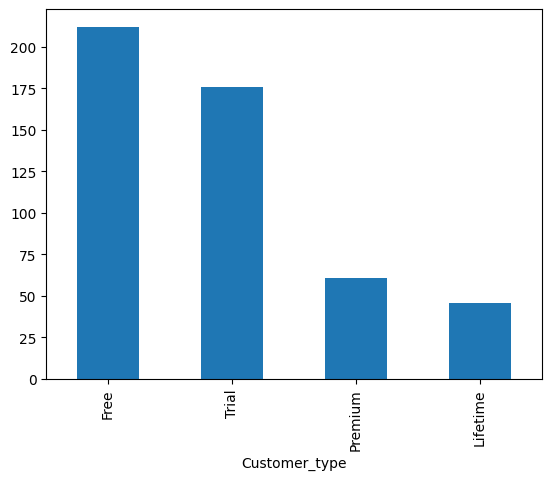

In [455]:
Fin_table['Customer_type'].value_counts().plot(kind='bar')
plt.savefig('bar.png')
plt.show()

**Relation between rating and amount purchased**

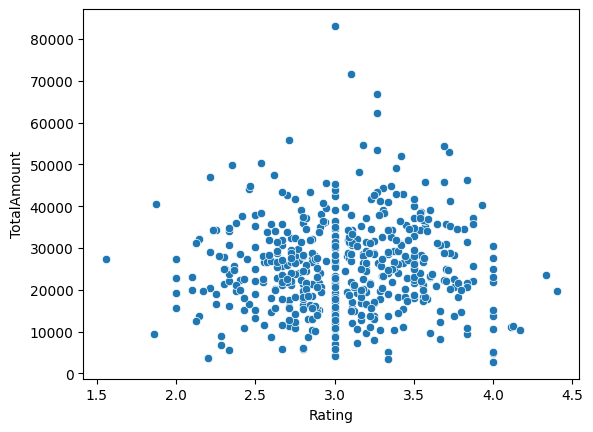

In [431]:
sns.scatterplot(x='Rating',y='TotalAmount',data=Fin_table)
plt.savefig('Scatter.png')
plt.show()

**Relation between price and quantity purchased**

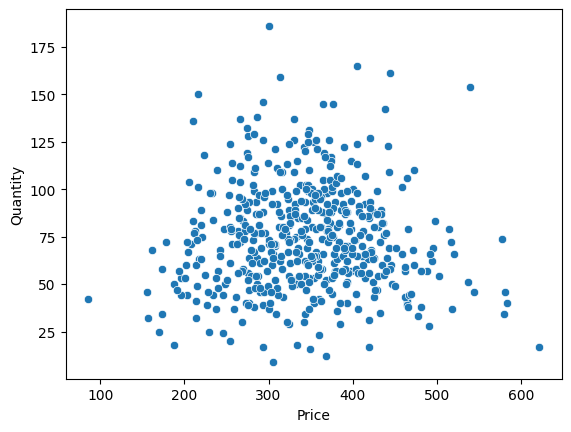

In [452]:
sns.scatterplot(x='Price',y='Quantity',data=Fin_table)
plt.savefig('scatter2.png')
plt.show()

**customer's transaction number distribution**

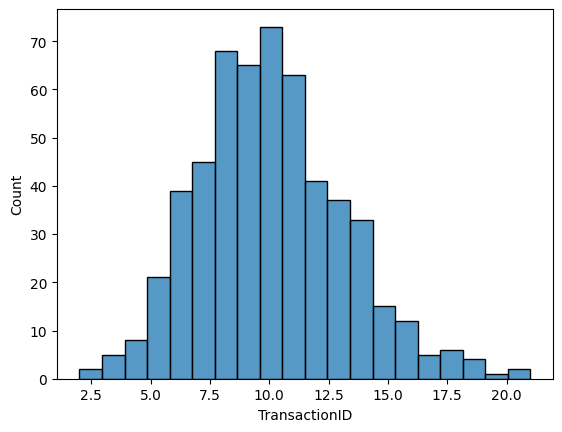

In [480]:
sns.histplot(x='TransactionID',data=Fin_table)

plt.show()

In [ ]:
Cust_dist=Cust_Table['Customer_type'].value_counts(normalize=True)
Cust_distri=Cust_dist.index.tolist()
Cust_proba=Cust_dist.values.tolist()
Cust_sum=Cust_Table['Customer_type'].isnull().sum()
Cust_type=np.random.choice(Cust_distri,size=Cust_sum,p=Cust_proba)
Cust_Table['Customer_type'].loc[Cust_Table['Customer_type'].isnull()]=Cust_type


# **Data Modelling**

**Converting all values to numeric for k-means clustering**

In [435]:
Cust_Table=pd.get_dummies(Cust_Table,columns=['Customer_type'],dtype=int,prefix='',prefix_sep='')
Cust_Table['Price']=Cust_Table['TotalAmount']/Cust_Table['Quantity']
Cust_Table['Average_Quantity']=Cust_Table['Quantity']/Cust_Table['TransactionID']
Cust_Table['Average_Amount']=Cust_Table['TotalAmount']/Cust_Table['TransactionID']
Cust_Table.head(5)


,CustomerID,TransactionID,Quantity,Rating,TotalAmount,Credit Card,Debit Card,PayPal,Free,Lifetime,Premium,Trial,Price,Average_Quantity,Average_Amount
0,1000,12,82,2.666667,30613.0,3,3,6,1,0,0,0,373.329268,6.833333,2551.083333
1,1001,10,69,3.600000,23102.0,8,2,0,1,0,0,0,334.811594,6.900000,2310.200000
2,1002,7,52,3.142857,19139.0,2,4,1,0,1,0,0,368.057692,7.428571,2734.142857
3,1003,9,80,3.111111,34415.0,3,3,3,0,0,1,0,430.187500,8.888889,3823.888889
4,1004,8,74,2.875000,26901.0,3,3,2,0,0,0,1,363.527027,9.250000,3362.625000


**Standardization of dataset  by removing the mean and scaling to unit variance**

In [436]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Final_table=pd.DataFrame(scaler.fit_transform(Cust_Table),columns=Cust_Table.columns)
Final_table.head(5)

,CustomerID,TransactionID,Quantity,Rating,TotalAmount,Credit Card,Debit Card,PayPal,Free,Lifetime,Premium,Trial,Price,Average_Quantity,Average_Amount
0,-1.737302,0.621827,0.261334,-0.816035,0.448944,-0.129850,-0.204520,1.443198,1.157176,-0.317821,-0.390154,-0.731581,0.346378,-0.447455,-0.045911
1,-1.730307,0.005653,-0.200284,1.132870,-0.238388,2.571225,-0.730290,-1.827250,1.157176,-0.317821,-0.390154,-0.731581,-0.135968,-0.400499,-0.349750
2,-1.723313,-0.918608,-0.803938,0.178304,-0.601042,-0.670065,0.321251,-1.282176,-0.864173,3.146427,-0.390154,-0.731581,0.280364,-0.028208,0.184991
3,-1.716318,-0.302434,0.190315,0.112015,0.796865,-0.129850,-0.204520,-0.192026,-0.864173,-0.317821,2.563093,-0.731581,1.058399,1.000343,1.559544
4,-1.709323,-0.610521,-0.022739,-0.381012,0.109259,-0.129850,-0.204520,-0.737101,-0.864173,-0.317821,-0.390154,1.366902,0.223627,1.254686,0.977728


**Finding the optimal number of cluster**

In [437]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia_value=[]
silhouette=[]
for k in range(2,16):
  kmeans=KMeans(n_clusters=k,n_init=10,random_state=42)
  kmeans.fit(Final_table)
  inertia_value.append(kmeans.inertia_)
  silhouette.append(silhouette_score(Final_table,kmeans.labels_,metric='euclidean',sample_size=None))



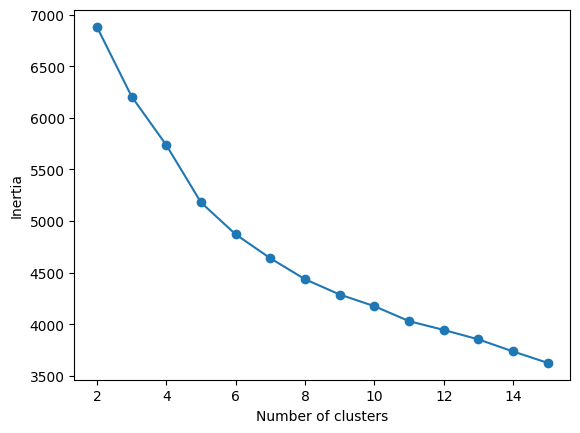

In [451]:
inertia_series=pd.Series(inertia_value,index=range(2,16))
inertia_series.plot(marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('Inertia.png')
plt.show()

**Fit the final dataset in the model**

In [439]:
kmeans1=kmeans=KMeans(n_clusters=5,n_init=20,random_state=42)
kmeans1.fit(Final_table)

KMeans(n_clusters=5, n_init=20, random_state=42)

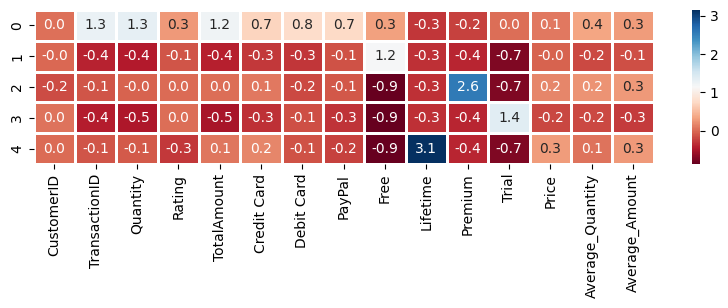

In [458]:
Center_Kluster=pd.DataFrame(kmeans1.cluster_centers_,columns=Final_table.columns)
plt.figure(figsize=(10,2))
sns.heatmap(Center_Kluster,annot=True,cmap="RdBu",fmt=".1f",linewidths=1)
plt.savefig('Heatmap2.png')
plt.show()


**Customer group**
0. Highest Performing group with highest quantity purchased per transaction value and average_order amount. A good number of **free** customer.

1.  customers with low quantity purchased per transaction value and average_order amount .Most of them are  **free** customer

2. Most of the customers are **Premium** and their average_quantity and average_amount is high

3. Lowest performing group with low average_quantity and average_amount per transaction value.Most of them are **trial** customers.

5. almost all of them are **lifetime** high price customers with lowest rating and low average_quantity value


In [442]:
Center_Kluster.head()

,CustomerID,TransactionID,Quantity,Rating,TotalAmount,Credit Card,Debit Card,PayPal,Free,Lifetime,Premium,Trial,Price,Average_Quantity,Average_Amount
0,0.035266,1.272829,1.323208,0.272742,1.230941,0.692216,0.778442,0.746450,0.313482,-0.287697,-0.236071,0.016574,0.090461,0.354634,0.284581
1,-0.006654,-0.406367,-0.449917,-0.123499,-0.419500,-0.279548,-0.293204,-0.132922,1.157176,-0.317821,-0.390154,-0.731581,-0.035187,-0.185718,-0.145062
2,-0.162920,-0.115715,-0.034575,0.005295,0.020766,0.091147,-0.180621,-0.109439,-0.864173,-0.317821,2.563093,-0.731581,0.160161,0.236630,0.276494
3,0.048932,-0.438902,-0.475777,0.017916,-0.512871,-0.318381,-0.148061,-0.301773,-0.864173,-0.317821,-0.390154,1.366902,-0.196635,-0.189171,-0.267910
4,0.010424,-0.120097,-0.087960,-0.283336,0.063797,0.167820,-0.140140,-0.236522,-0.864173,3.146427,-0.390154,-0.731581,0.289102,0.053370,0.265783


In [443]:
Final_Data=pd.concat([Cust_Table,pd.DataFrame(kmeans1.labels_,columns=['Cluster'])],axis=1)
Final_Data.head(5)

,CustomerID,TransactionID,Quantity,Rating,TotalAmount,Credit Card,Debit Card,PayPal,Free,Lifetime,Premium,Trial,Price,Average_Quantity,Average_Amount,Cluster
0,1000,12,82,2.666667,30613.0,3,3,6,1,0,0,0,373.329268,6.833333,2551.083333,1
1,1001,10,69,3.600000,23102.0,8,2,0,1,0,0,0,334.811594,6.900000,2310.200000,1
2,1002,7,52,3.142857,19139.0,2,4,1,0,1,0,0,368.057692,7.428571,2734.142857,4
3,1003,9,80,3.111111,34415.0,3,3,3,0,0,1,0,430.187500,8.888889,3823.888889,2
4,1004,8,74,2.875000,26901.0,3,3,2,0,0,0,1,363.527027,9.250000,3362.625000,3


# **Insights**

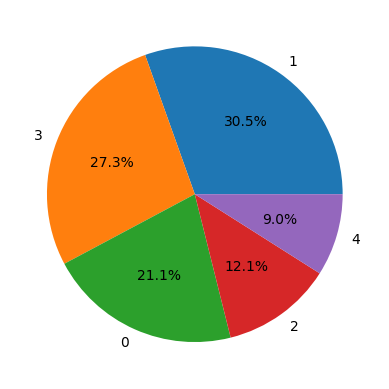

In [461]:
plt.pie(Final_Data['Cluster'].value_counts(),labels=Final_Data['Cluster'].value_counts().index,autopct='%1.1f%%')
plt.savefig('pie.png')
plt.show()

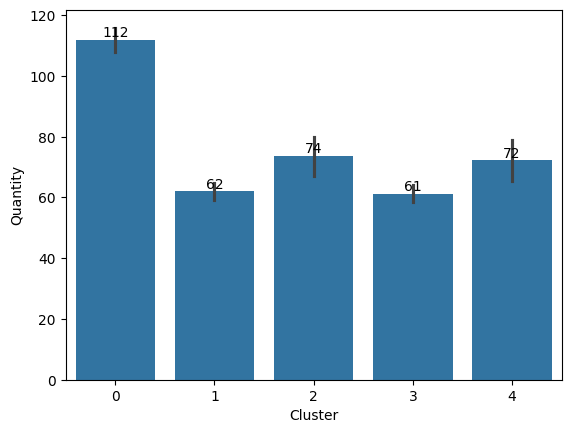

In [470]:
ax=sns.barplot(x='Cluster',y='Quantity',data=Final_Data)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.ylabel('Quantity')
plt.savefig('bar2.png')
plt.show()

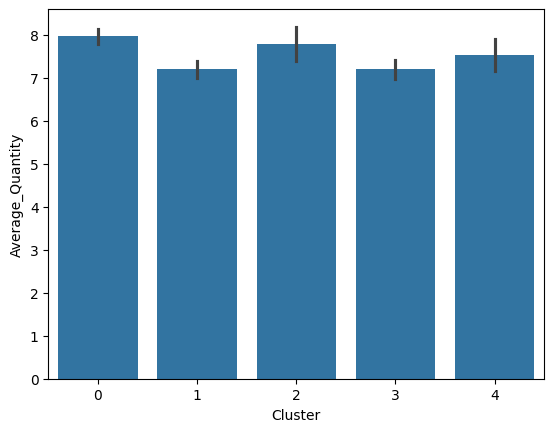

In [465]:
ax1=sns.barplot(x='Cluster',y='Average_Quantity',data=Final_Data)
for r in ax1.patches:
    ax.annotate(f'{r.get_height():.0f}',
                (r.get_x() + r.get_width() / 1., r.get_height()),
                ha='center', va='bottom')
plt.ylabel('Average_Quantity')
plt.savefig('bar3.png')
plt.show()

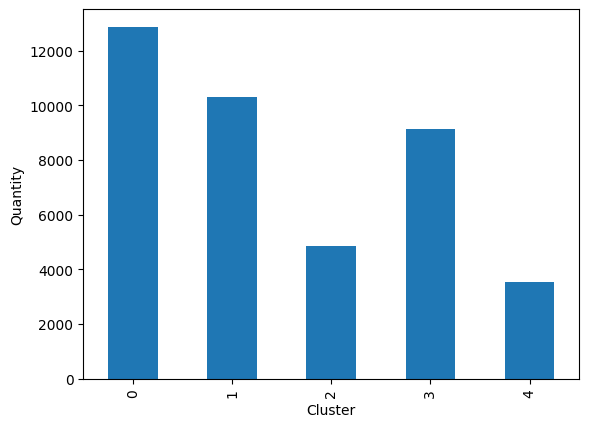

In [477]:
Final_Data.groupby('Cluster')['Quantity'].sum().plot(kind='bar')
plt.ylabel('Quantity')
plt.savefig('bar4.png')
plt.show()

# **Recommendation:**
1. Convert the 0 group's free and trial customer to lifetime/premium customer

2. Provide some discount on price for group 0 customer

3. Provide special offer with customer based marketing for free and trial customer of group 1 and 3

4. Improve the service level (on time delivery, improve the quality of high price product) for lifetime customer